In [298]:
import pandas as pd
import matplotlib.pyplot as plt


In [299]:
NBAR ="1.3"

In [300]:
data = pd.read_csv("output/"+NBAR+"/acc_bin_all_fnn.csv")

In [301]:
stat_colulms = ["BIN","VAE_MAX-AAC-XBAR","VAE_MAX-AAC-X","VAE_AAE_ACC","VAE_MEAN_LOSS","VAE_BEST_MODEL_PROB",
                "FNN_MAX-AAC-XBAR","FNN_MAX-AAC-X","FNN_AAE_ACC","FNN_MEAN_LOSS","FNN_BEST_MODEL_PROB"]
stats = pd.DataFrame(columns=stat_colulms)

In [302]:
data.head(40)

,BIN_SIZE,ITR,VAE-AAC-XBAR,VAE-AAC-X,VAE-LOSS,FNN-AAC-XBAR,FNN-AAC-X,FNN-LOSS
0,40,0,0.5075,0.5475,0.6927,0.4750,0.6475,0.6281
1,40,1,0.4750,0.4750,0.6939,0.5950,0.6275,0.6423
2,40,2,0.4750,0.4750,0.6938,0.4800,0.6275,0.6369
3,40,3,0.6150,0.6375,0.6548,0.5750,0.6475,0.6333
4,40,4,0.4750,0.4750,0.6938,0.6100,0.6475,0.6255
5,40,5,0.4750,0.4750,0.6938,0.4650,0.6475,0.6242
6,40,6,0.5525,0.6025,0.6909,0.5425,0.6450,0.6335
7,40,7,0.4750,0.4750,0.6938,0.4750,0.4750,0.6939
8,40,8,0.6450,0.6275,0.6247,0.4750,0.4750,0.6939
9,40,9,0.6450,0.6175,0.6375,0.6150,0.6475,0.6264


In [303]:
BINS = data['BIN_SIZE'].unique()
BINS.sort()
print(BINS)

[ 10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170 180
 190 200]


In [304]:
stats_data = list()
for BIN in BINS:
    bin_data = data[data["BIN_SIZE"] == BIN]
    row = list()
    row.append(BIN)
    
    VAE_MAX_AAC_XBAR = bin_data["VAE-AAC-XBAR"].max()
    VAE_MAX_AAC_XBAR = round(VAE_MAX_AAC_XBAR,5)
    row.append(VAE_MAX_AAC_XBAR)
    
    VAE_MAX_AAC_X = bin_data["VAE-AAC-X"].max()
    VAE_MAX_AAC_X = round(VAE_MAX_AAC_X,5)
    row.append(VAE_MAX_AAC_X)
    
    VAE_AAE_ACC = abs(bin_data["VAE-AAC-XBAR"] - bin_data["VAE-AAC-X"]).mean()
    VAE_AAE_ACC = round(VAE_AAE_ACC,5)
    row.append(VAE_AAE_ACC)
    
    VAE_MEAN_LOSS = bin_data["VAE-LOSS"].mean()
    VAE_MEAN_LOSS = round(VAE_MEAN_LOSS,5)
    row.append(VAE_MEAN_LOSS) 
    
    VAE_BEST_MODEL_PROB = len(bin_data[bin_data["VAE-AAC-XBAR"] >= 0.5])/len(bin_data)
    VAE_BEST_MODEL_PROB = round(VAE_BEST_MODEL_PROB,5)
    row.append(VAE_BEST_MODEL_PROB)
    
    #-----
    
    FNN_MAX_AAC_XBAR = bin_data["FNN-AAC-XBAR"].max()
    FNN_MAX_AAC_XBAR = round(FNN_MAX_AAC_XBAR,5)
    row.append(FNN_MAX_AAC_XBAR)
    
    FNN_MAX_AAC_X = bin_data["FNN-AAC-X"].max()
    FNN_MAX_AAC_X = round(FNN_MAX_AAC_X,5)
    row.append(FNN_MAX_AAC_X)
    
    FNN_AAE_ACC = abs(bin_data["FNN-AAC-XBAR"] - bin_data["FNN-AAC-X"]).mean()
    FNN_AAE_ACC = round(FNN_AAE_ACC,5)
    row.append(FNN_AAE_ACC)
    
    FNN_MEAN_LOSS = bin_data["FNN-LOSS"].mean()
    FNN_MEAN_LOSS = round(FNN_MEAN_LOSS,5)
    row.append(FNN_MEAN_LOSS)
    
    FNN_BEST_MODEL_PROB = len(bin_data[bin_data["FNN-AAC-XBAR"] >= 0.5])/len(bin_data)
    FNN_BEST_MODEL_PROB = round(FNN_BEST_MODEL_PROB,5)
    row.append(FNN_BEST_MODEL_PROB)
    
    stats_data.append(row)


In [305]:
stats_data_csv = pd.DataFrame(stats_data,columns=stat_colulms)
stats_data_csv.head(100)

,BIN,VAE_MAX-AAC-XBAR,VAE_MAX-AAC-X,VAE_AAE_ACC,VAE_MEAN_LOSS,VAE_BEST_MODEL_PROB,FNN_MAX-AAC-XBAR,FNN_MAX-AAC-X,FNN_AAE_ACC,FNN_MEAN_LOSS,FNN_BEST_MODEL_PROB
0,10,0.5800,0.6050,0.01700,0.68112,0.9,0.5725,0.5800,0.01225,0.67912,0.7
1,20,0.5925,0.5925,0.00175,0.68914,0.6,0.5725,0.6000,0.04275,0.67538,0.8
2,30,0.6025,0.6175,0.01275,0.68473,0.4,0.5925,0.6175,0.05175,0.67736,0.2
3,40,0.6450,0.6375,0.01575,0.67697,0.5,0.6150,0.6475,0.07800,0.64380,0.5
4,50,0.6675,0.6700,0.01700,0.66376,0.4,0.6700,0.7025,0.06975,0.63175,0.4
5,60,0.7025,0.7075,0.02800,0.64861,0.6,0.6325,0.7125,0.07250,0.64383,0.2
6,70,0.6825,0.6725,0.00775,0.68346,0.2,0.5250,0.7300,0.16150,0.60893,0.1
7,80,0.7100,0.7300,0.02100,0.67005,0.2,0.7050,0.7700,0.13200,0.55038,0.5
8,90,0.7250,0.7075,0.01625,0.67060,0.2,0.7225,0.7500,0.18500,0.55069,0.4
9,100,0.7450,0.7250,0.03025,0.63711,0.6,0.5275,0.7625,0.21100,0.54459,0.4


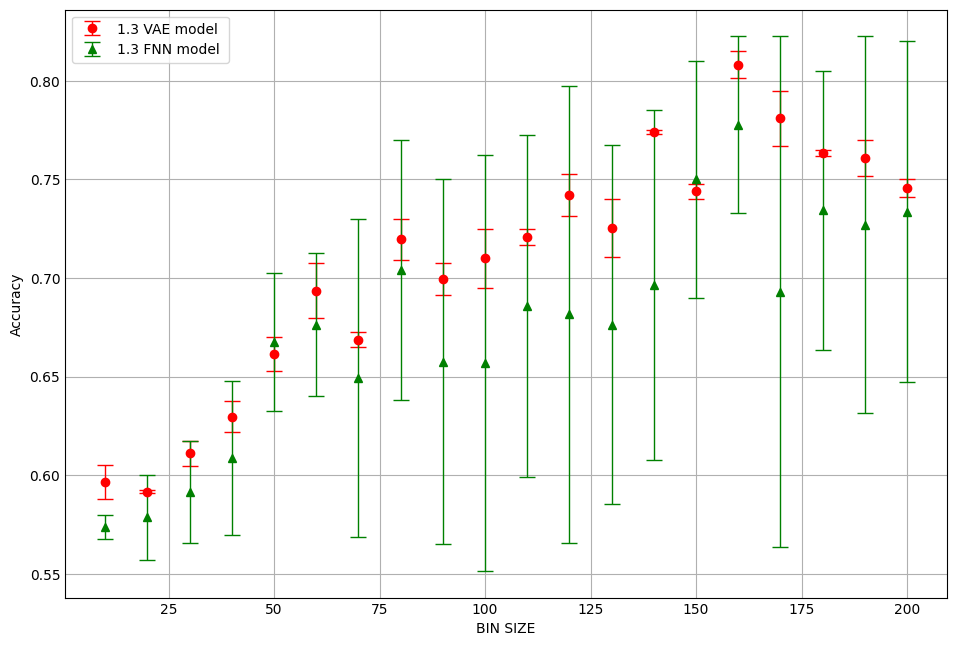

In [306]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')


vaex = stats_data_csv['BIN']
vaey = stats_data_csv['VAE_MAX-AAC-X'] - stats_data_csv['VAE_AAE_ACC']/2
vaeyerr = stats_data_csv['VAE_AAE_ACC']/2

fnnx = stats_data_csv['BIN']
fnny = stats_data_csv['FNN_MAX-AAC-X']- stats_data_csv['FNN_AAE_ACC']/2
fnnyerr = stats_data_csv['FNN_AAE_ACC']/2

# plot:

fig, ax = plt.subplots(figsize=(9, 6))

ax.errorbar(vaex, vaey, vaeyerr, color='red', fmt='o', linewidth=1, capsize=6,label=NBAR+" VAE model ")
ax.errorbar(fnnx, fnny, fnnyerr, color='green', fmt='^', linewidth=1, capsize=6, label=NBAR+" FNN model ")
plt.xlabel("BIN SIZE")
plt.ylabel("Accuracy")
plt.legend()
name = "Results/"+"Accuracy_graph_"+NBAR+".png"
plt.savefig(name,bbox_inches='tight')
plt.show()


In [307]:
stats_data_csv['VAE_LOGIT_ACC'] = np.log(stats_data_csv['VAE_MAX-AAC-XBAR']/ ( 1- stats_data_csv['VAE_MAX-AAC-XBAR']))
stats_data_csv['FNN_LOGIT_ACC'] = np.log(stats_data_csv['FNN_MAX-AAC-XBAR']/ ( 1- stats_data_csv['FNN_MAX-AAC-XBAR']))

stats_data_csv.to_csv("Results/"+"STATS_"+NBAR+".csv")

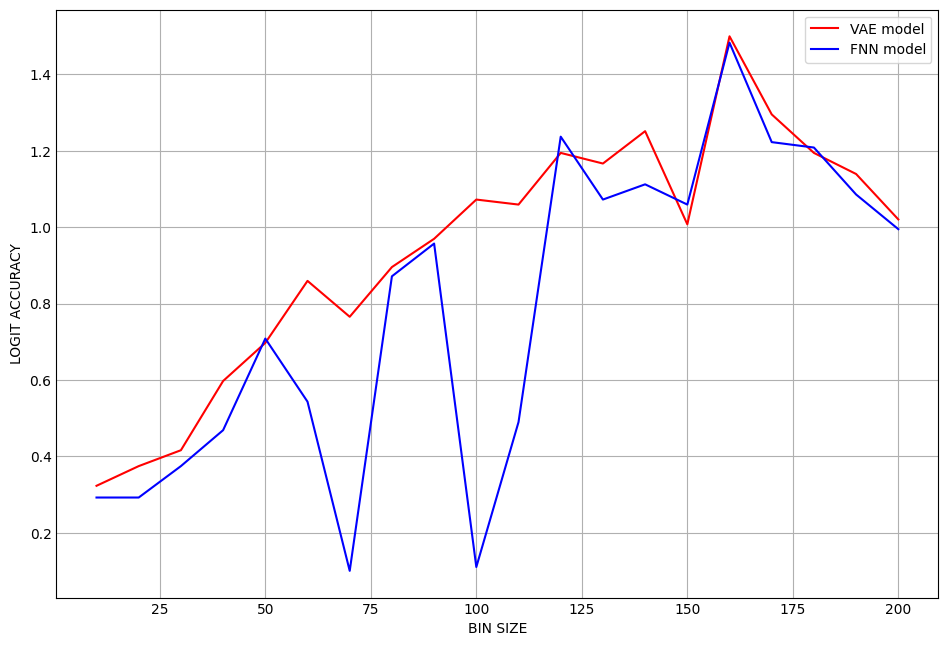

In [308]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(stats_data_csv['BIN'],stats_data_csv['VAE_LOGIT_ACC'],color='red', label="VAE model")
ax.plot(stats_data_csv['BIN'],stats_data_csv['FNN_LOGIT_ACC'],color='blue', label="FNN model")
plt.xlabel("BIN SIZE")
plt.ylabel("LOGIT ACCURACY")
plt.legend()
name = "Results/"+"LOGIT_Accuracy_graph_"+NBAR+".png"
plt.savefig(name,bbox_inches='tight')
plt.show()


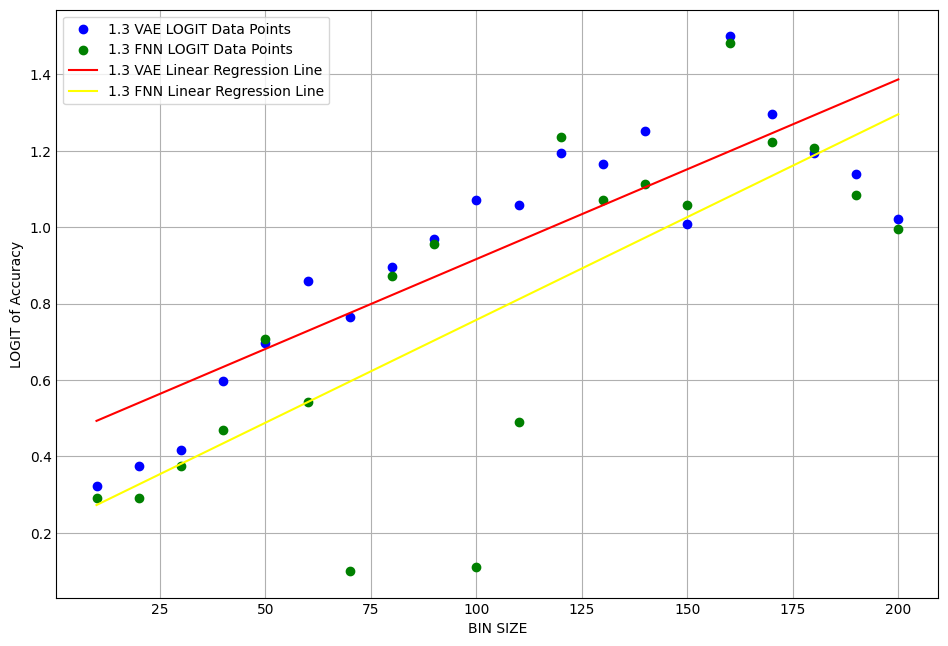

In [309]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Sample data
x = stats_data_csv[['BIN']]
vaey = stats_data_csv['VAE_LOGIT_ACC']
fnny = stats_data_csv['FNN_LOGIT_ACC']

# Reshape the data because scikit-learn expects a 2D array


# Create a linear regression model
vaemodel = LinearRegression()
fnnmodel = LinearRegression()

# Fit the model to the data
vaemodel.fit(x, vaey)
fnnmodel.fit(x, fnny)

# Make predictions
vaepredictions = vaemodel.predict(x)
fnnpredictions = fnnmodel.predict(x)

fig, ax = plt.subplots(figsize=(9, 6))
# Plot the original data points
ax.scatter(x, vaey, color='blue', label=NBAR+' VAE LOGIT Data Points')
ax.scatter(x, fnny, color='green', label=NBAR+' FNN LOGIT Data Points')

# Plot the linear regression line
ax.plot(x, vaepredictions, color='red', label=NBAR+' VAE Linear Regression Line')
ax.plot(x, fnnpredictions, color='yellow', label=NBAR+' FNN Linear Regression Line')

# Adding labels to the axes
plt.ylabel('LOGIT of Accuracy')
plt.xlabel('BIN SIZE')

# Adding a legend
plt.legend()

name = "Results/"+"Regression_graph_"+NBAR+".png"
plt.savefig(name,bbox_inches='tight')
# Display the plot
plt.show()



In [310]:
vaemodel.coef_[0]

0.00470508974020994

In [311]:
fnnmodel.coef_[0]

0.005384961186669288

In [312]:
vaemodel.intercept_

0.4456942305209383

In [313]:
fnnmodel.intercept_

0.2185419366550776

In [314]:
def custom_sigmoid(x):
    return round(1 / (1 + np.exp(-x)), 5)

In [315]:
vaeY = [custom_sigmoid(vaemodel.predict([[x]])[0]) for x in range(10, 1010, 10)]

/Users/shivakumarsuresh/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/shivakumarsuresh/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/shivakumarsuresh/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/shivakumarsuresh/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/shivakumarsuresh/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted w

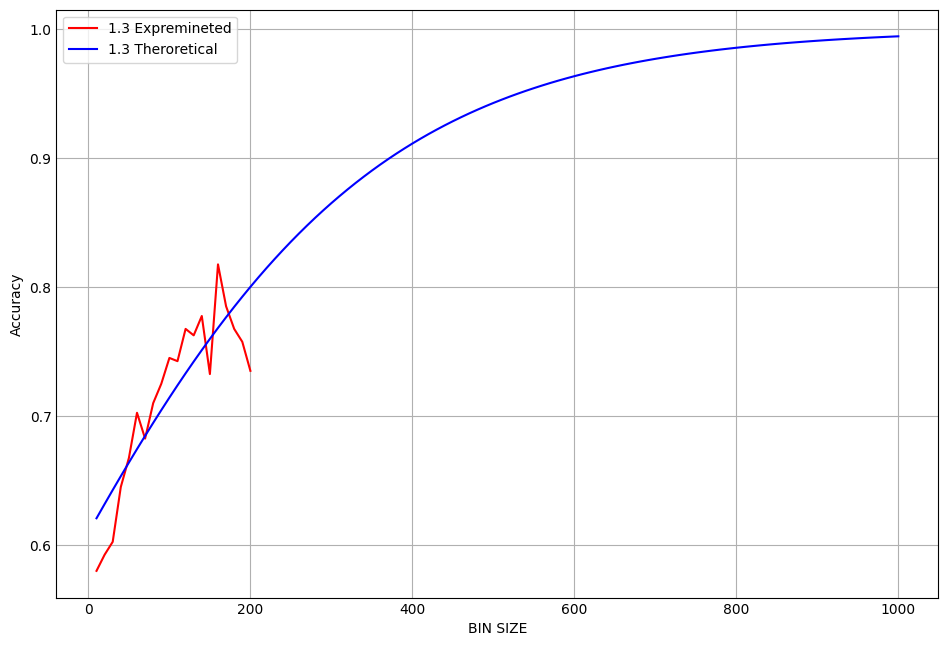

In [316]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(stats_data_csv['BIN'],stats_data_csv['VAE_MAX-AAC-XBAR'],color='red', label =NBAR+" Expremineted")
ax.plot([i for i in range(10,1010,10) ],vaeY,color='blue',label=NBAR+" Theroretical")
plt.xlabel("BIN SIZE")
plt.ylabel("Accuracy")
plt.legend()
name = "Results/"+"graph_fit_"+NBAR+".png"
plt.savefig(name,bbox_inches='tight')
plt.show()

In [317]:
def predic_binsize(acc):
    logit_acc = np.log(acc/(1-acc)) 
    binsize = (logit_acc-vaemodel.intercept_)/vaemodel.coef_[0]
    return int(binsize)
    

In [318]:
predic_binsize(0.9)

372